Author: Alexis Laignelet

Date: 06/09/19

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import copy
from gradient_descent import SGLD

# 1D non-convex example

## Objective function

In [2]:
def obj_a(x):
    return 1/2*x**2 

In [3]:
x = np.linspace(-1, 1, 100)

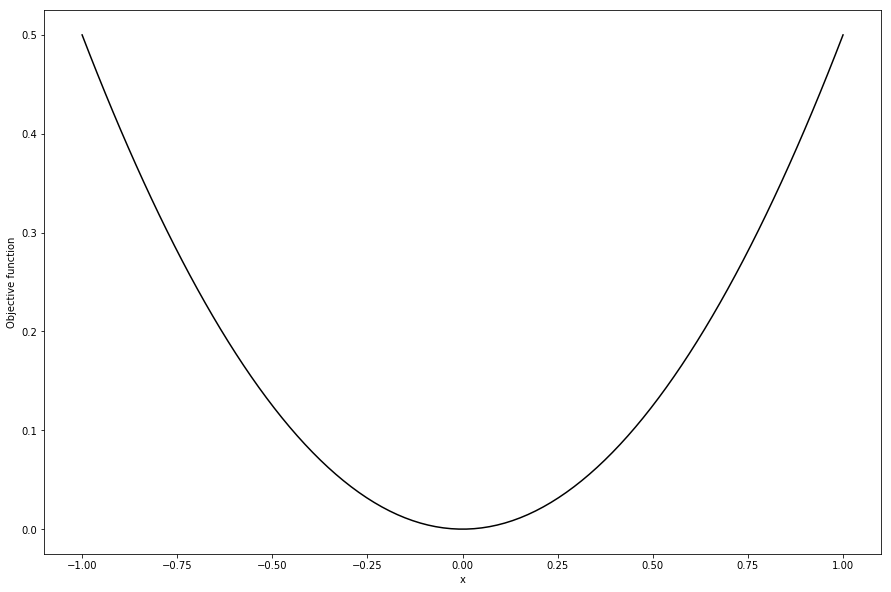

In [4]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_a(x), color='black')
plt.xlabel('x')
plt.ylabel('Objective function');

## Explicit - SGD

In [5]:
torch.manual_seed(1)
X = torch.rand(1)
X.requires_grad = True

lr = 1e-1
nb_iter = 50

In [6]:
optimizer = optim.SGD([X], lr)

In [7]:
train_loss = np.array([])
train_X = np.array([])

for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj_a(X)  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 3.489e-02
It: 20/50 | Loss: 4.242e-03
It: 30/50 | Loss: 5.157e-04
It: 40/50 | Loss: 6.270e-05


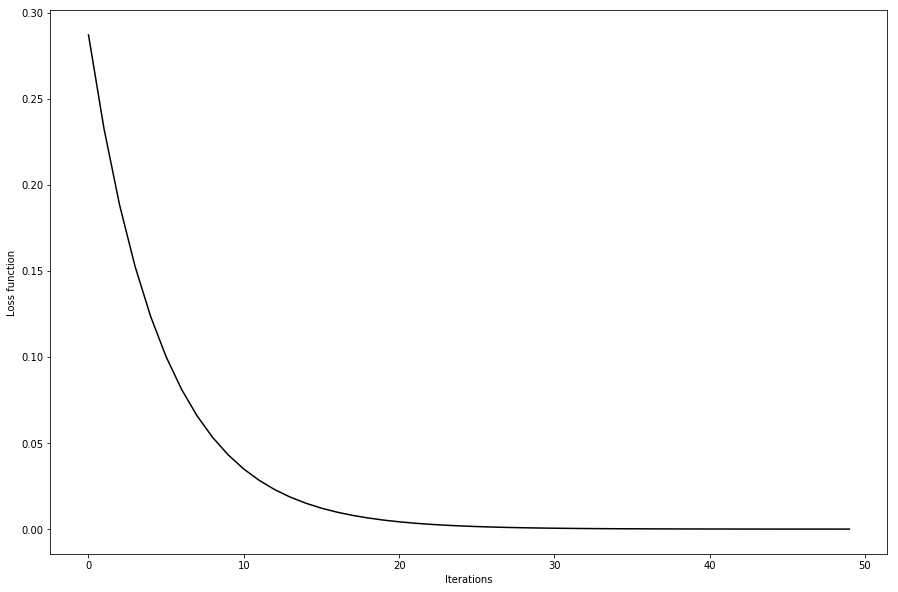

In [8]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

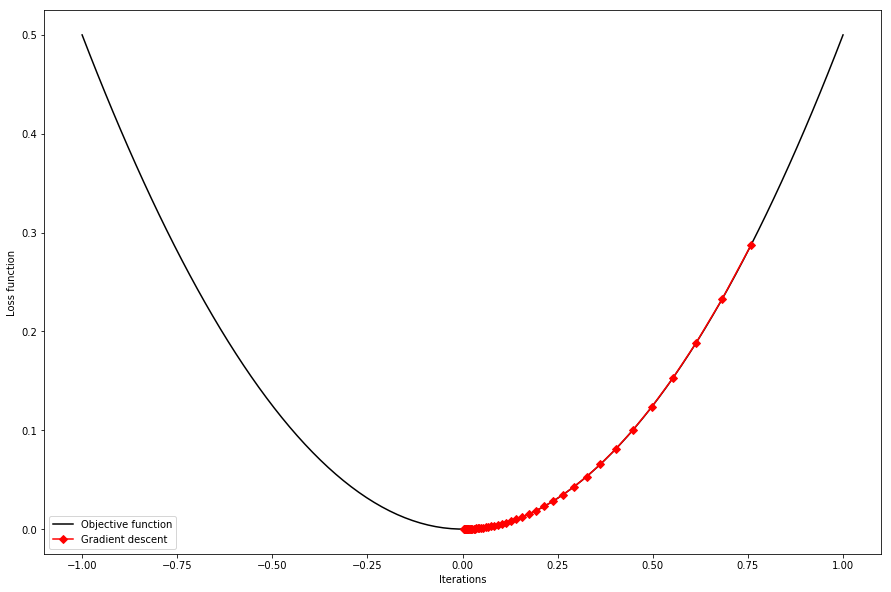

In [9]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_a(x), color='black', label='Objective function')
plt.plot(train_X, obj_a(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

## Explicit - SGLD

In [10]:
torch.manual_seed(1)
X = torch.rand(1)
X.requires_grad = True

lr = 1e-1
nb_iter = 50
beta = 10

In [11]:
optimizer = SGLD([X], lr, **{'beta':beta})

In [12]:
train_loss = np.array([])
train_X = np.array([])

for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj_a(X)  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 2.166e-02
It: 20/50 | Loss: 9.073e-03
It: 30/50 | Loss: 1.616e-03
It: 40/50 | Loss: 2.060e-02


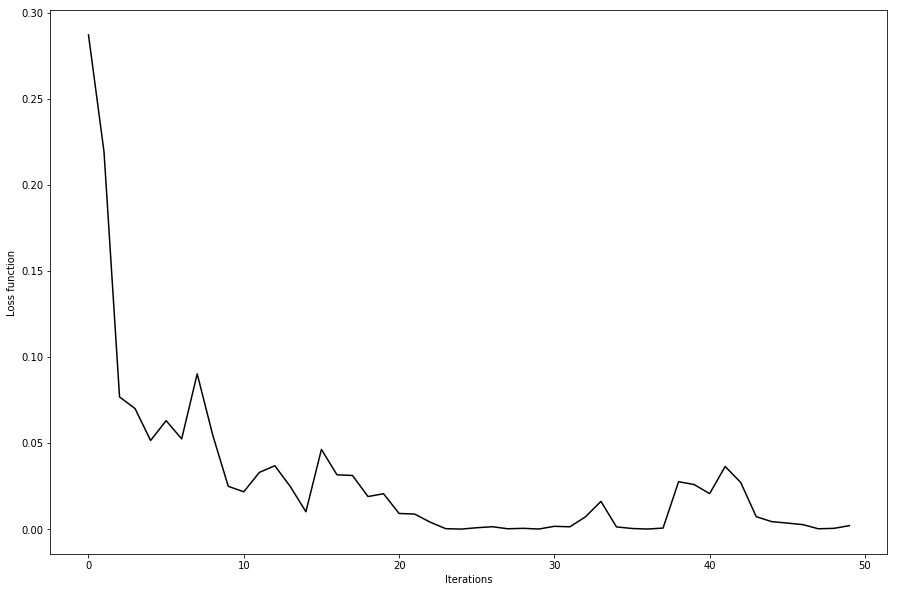

In [13]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

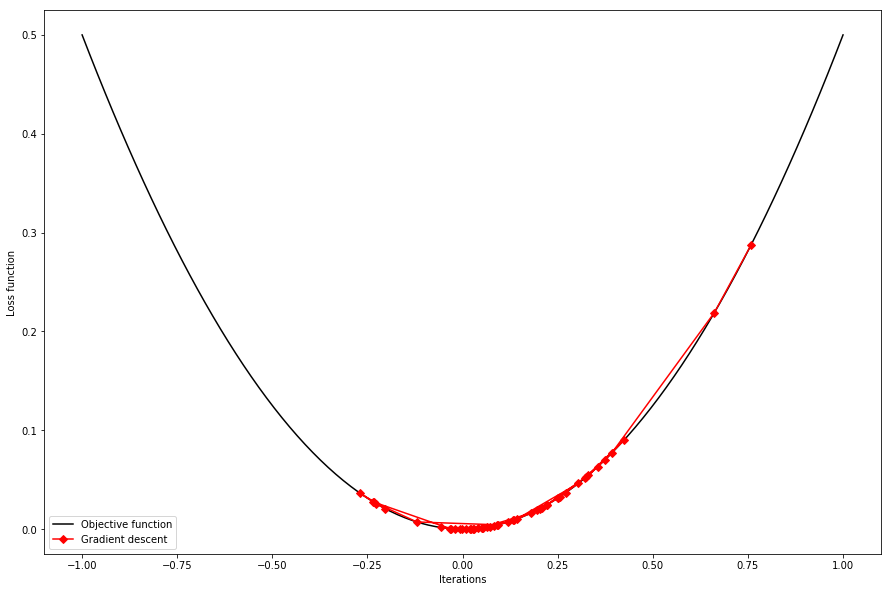

In [14]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_a(x), color='black', label='Objective function')
plt.plot(train_X, obj_a(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

### Influence of beta

In [15]:
lr = 1e-1
nb_iter = 50
list_beta = [100, 1]

In [16]:
train_loss_total = []
train_X_total = []

for beta in list_beta:
    print('Beta: ', beta)
    train_loss = np.array([])
    train_X = np.array([])
    
    torch.manual_seed(1)
    X = torch.rand(1)
    X.requires_grad = True

    optimizer = SGLD([X], lr, **{'beta':beta})
    for it in range(nb_iter):
        optimizer.zero_grad()
        loss = obj_a(X)  
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_X = np.append(train_X, X.detach().numpy())

        if it%10 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
        loss.backward()
        optimizer.step()
    
    train_loss_total.append(train_loss)
    train_X_total.append(train_X)

Beta:  100
It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 3.037e-02
It: 20/50 | Loss: 5.574e-03
It: 30/50 | Loss: 7.933e-06
It: 40/50 | Loss: 1.598e-03
Beta:  1
It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 3.783e-03
It: 20/50 | Loss: 2.572e-02
It: 30/50 | Loss: 3.106e-02
It: 40/50 | Loss: 2.218e-01


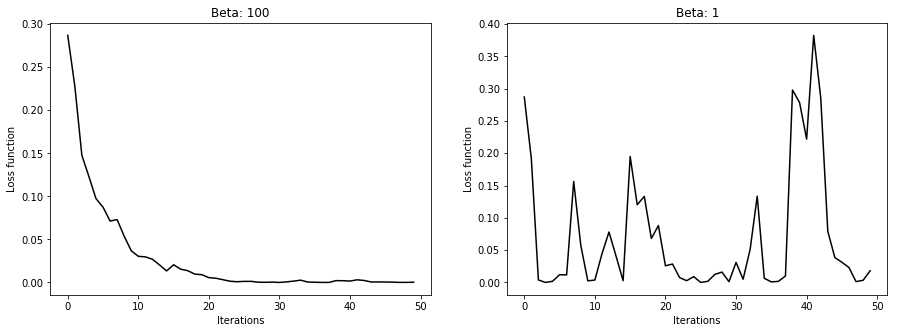

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Beta: ' + str(list_beta[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

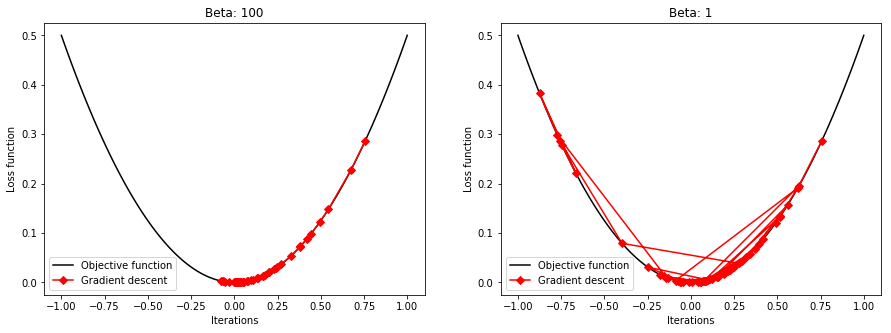

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_X in enumerate(train_X_total):
    ax = axs[i]
    ax.plot(x, obj_a(x), color='black')
    ax.plot(train_X, obj_a(train_X), color='red', marker='D')
    ax.set_title('Beta: ' + str(list_beta[i]))
    ax.legend(['Objective function','Gradient descent'])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

## Implicit - SGD

In [19]:
torch.manual_seed(1)
X = torch.rand(1)
X.requires_grad = True

lr = 1e-1
nb_iter = 50
implicit_iter = 5
tau = 1e-0

In [20]:
optimizer = optim.SGD([X], lr)

It: 0/50 | Loss: 2.870e-01


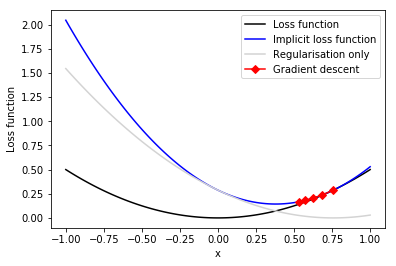

It: 1/50 | Loss: 1.589e-01


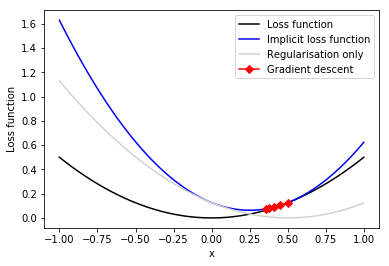

It: 2/50 | Loss: 7.003e-02


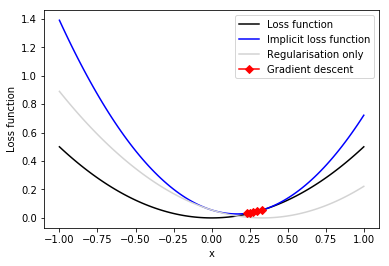

It: 3/50 | Loss: 3.086e-02


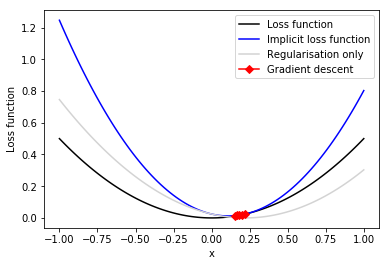

It: 4/50 | Loss: 1.360e-02


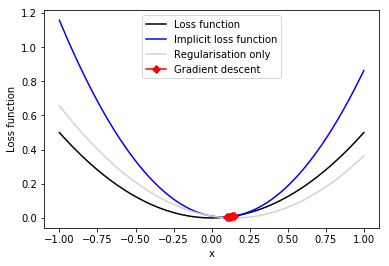

It: 5/50 | Loss: 5.993e-03


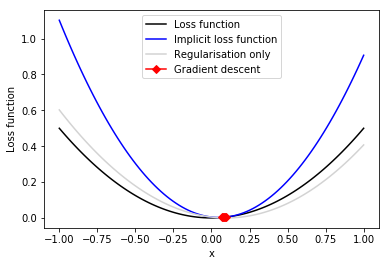

It: 6/50 | Loss: 2.641e-03


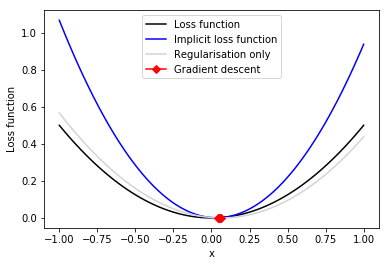

It: 7/50 | Loss: 1.164e-03


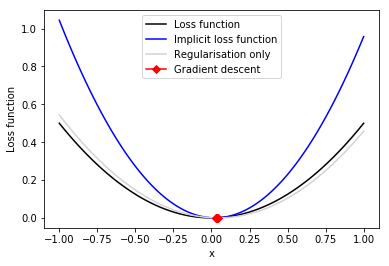

It: 8/50 | Loss: 5.129e-04


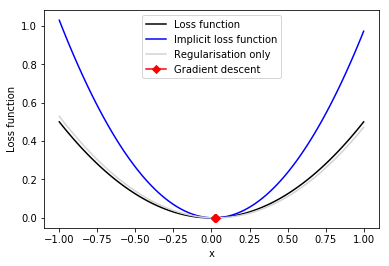

It: 9/50 | Loss: 2.260e-04


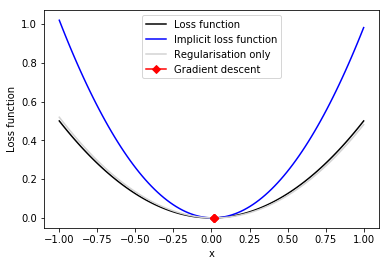

It: 10/50 | Loss: 9.961e-05


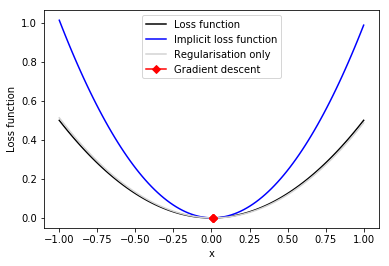

It: 11/50 | Loss: 4.390e-05


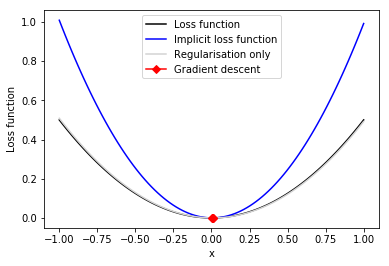

It: 12/50 | Loss: 1.934e-05


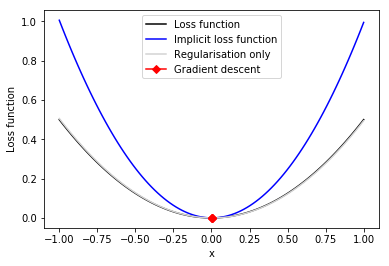

It: 13/50 | Loss: 8.525e-06


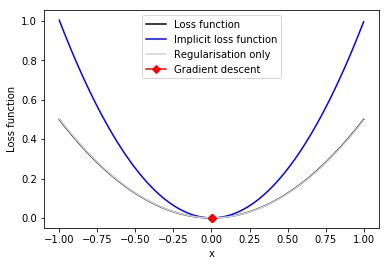

It: 14/50 | Loss: 3.757e-06


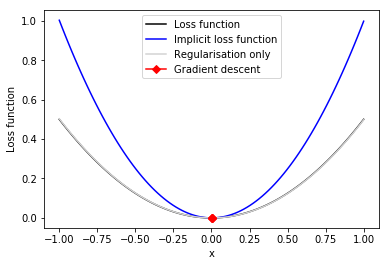

It: 15/50 | Loss: 1.655e-06


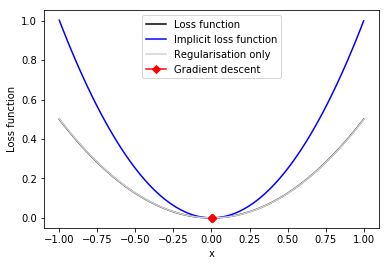

It: 16/50 | Loss: 7.295e-07


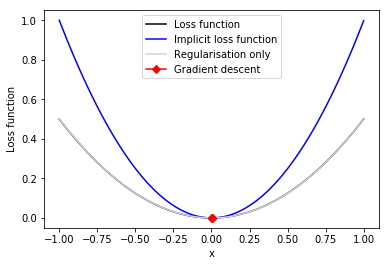

It: 17/50 | Loss: 3.215e-07


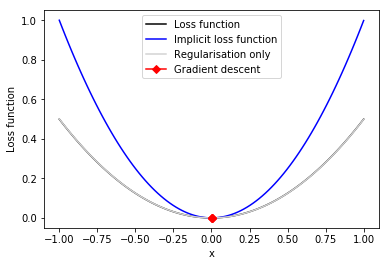

It: 18/50 | Loss: 1.417e-07


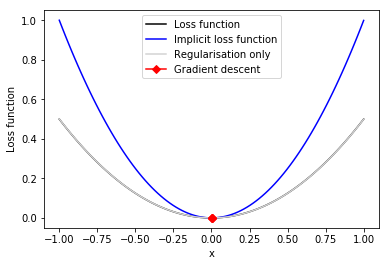

It: 19/50 | Loss: 6.244e-08


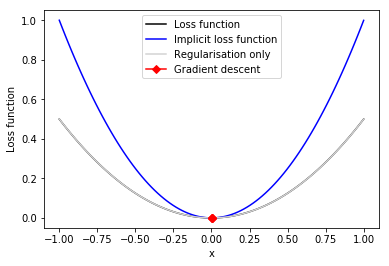

It: 20/50 | Loss: 2.751e-08


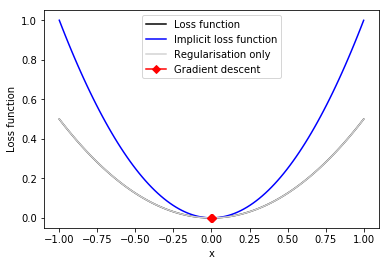

It: 21/50 | Loss: 1.213e-08


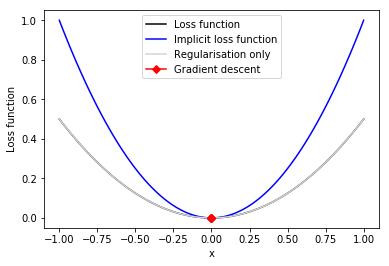

It: 22/50 | Loss: 5.343e-09


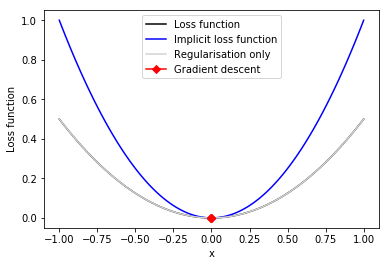

It: 23/50 | Loss: 2.355e-09


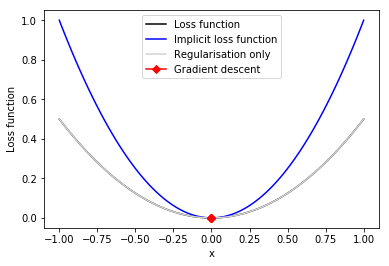

It: 24/50 | Loss: 1.038e-09


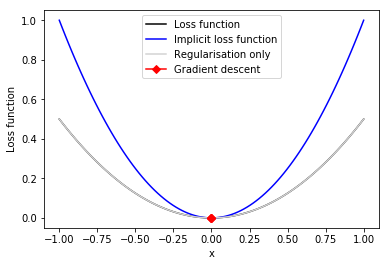

It: 25/50 | Loss: 4.573e-10


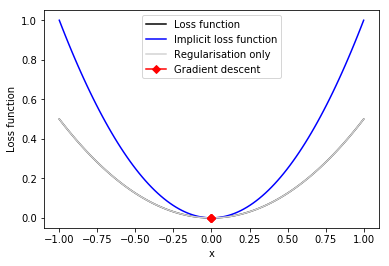

It: 26/50 | Loss: 2.015e-10


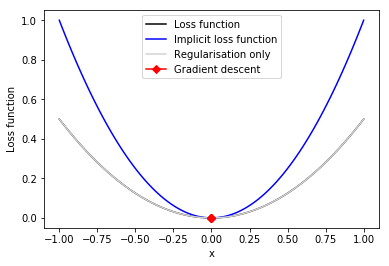

It: 27/50 | Loss: 8.881e-11


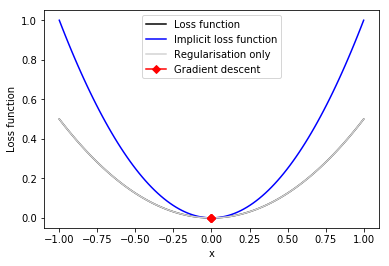

It: 28/50 | Loss: 3.914e-11


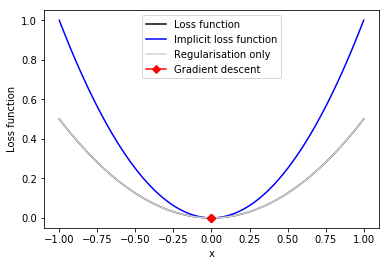

It: 29/50 | Loss: 1.725e-11


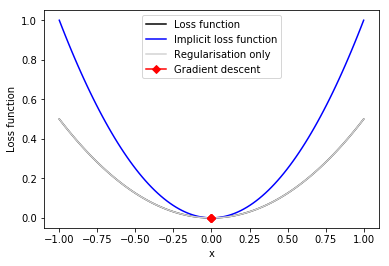

It: 30/50 | Loss: 7.600e-12


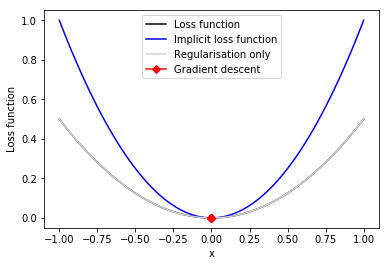

It: 31/50 | Loss: 3.349e-12


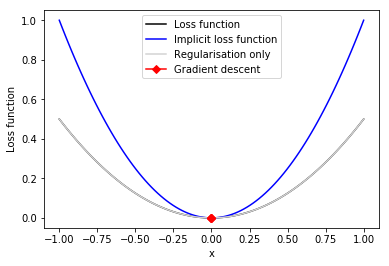

It: 32/50 | Loss: 1.476e-12


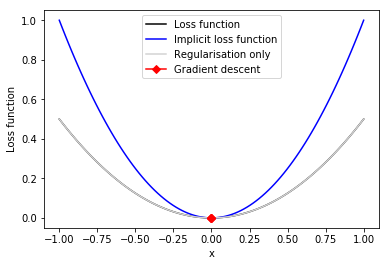

It: 33/50 | Loss: 6.504e-13


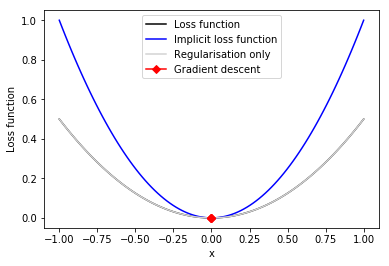

It: 34/50 | Loss: 2.866e-13


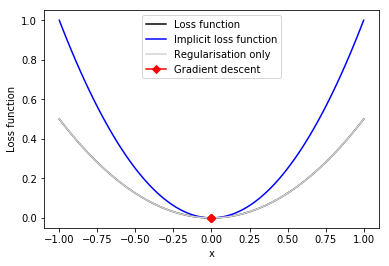

It: 35/50 | Loss: 1.263e-13


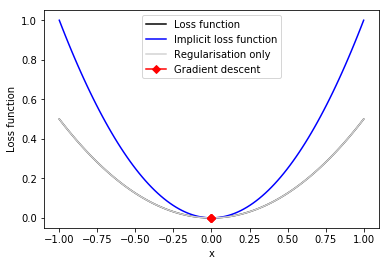

It: 36/50 | Loss: 5.567e-14


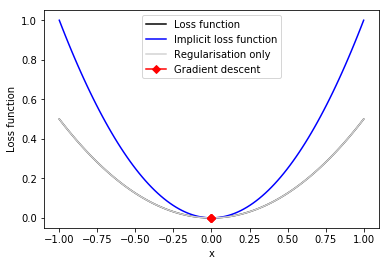

It: 37/50 | Loss: 2.453e-14


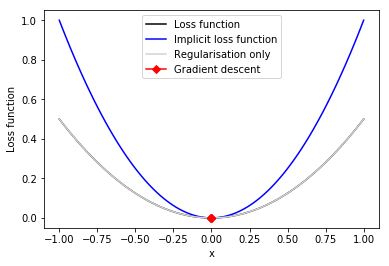

It: 38/50 | Loss: 1.081e-14


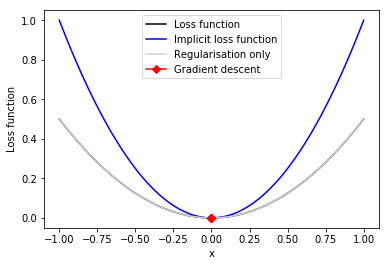

It: 39/50 | Loss: 4.764e-15


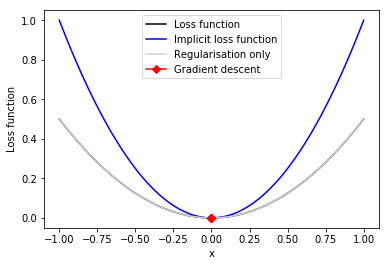

It: 40/50 | Loss: 2.099e-15


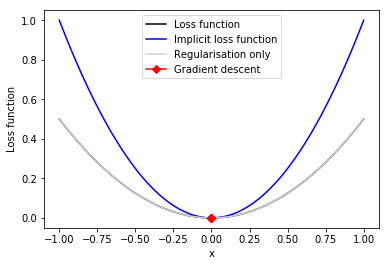

It: 41/50 | Loss: 9.252e-16


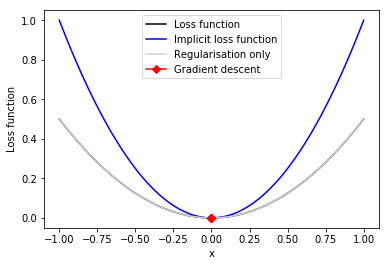

It: 42/50 | Loss: 4.077e-16


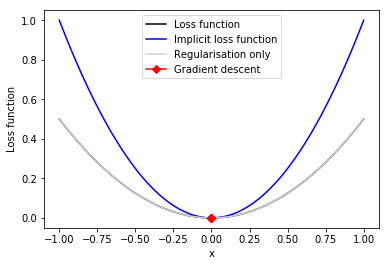

It: 43/50 | Loss: 1.797e-16


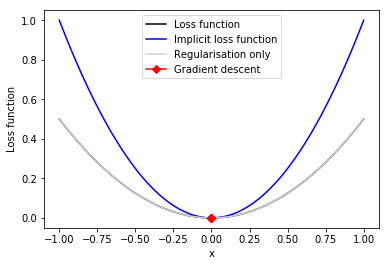

It: 44/50 | Loss: 7.918e-17


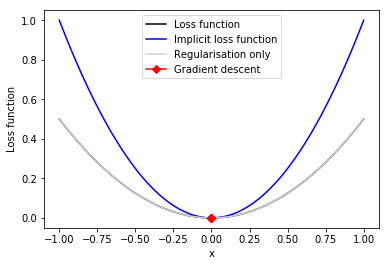

It: 45/50 | Loss: 3.489e-17


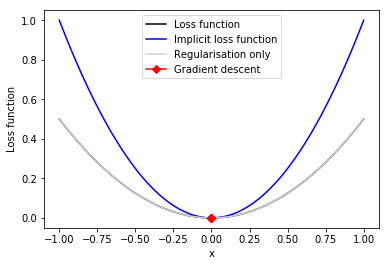

It: 46/50 | Loss: 1.538e-17


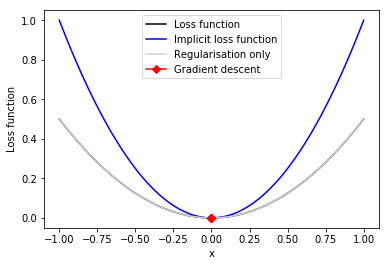

It: 47/50 | Loss: 6.776e-18


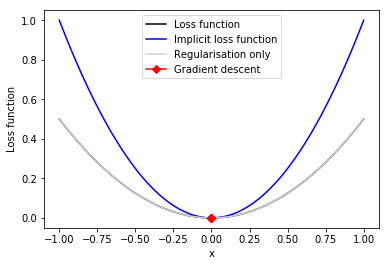

It: 48/50 | Loss: 2.986e-18


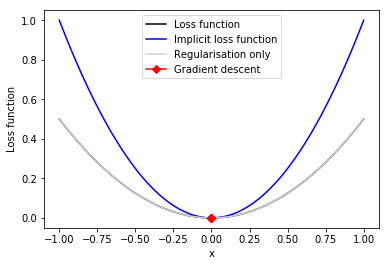

It: 49/50 | Loss: 1.316e-18


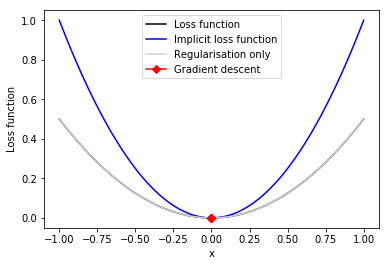

In [21]:
train_loss = np.array([])
train_X = np.array([])
loss = obj_a(X)
train_loss = np.append(train_loss, loss.detach().numpy())
train_X = np.append(train_X, X.detach().numpy())

for it in range(nb_iter):
    if it%1 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

    X_ = copy.deepcopy(X)
    X_.requires_grad = False

    train_loss_inner = np.array([])
    train_X_inner = np.array([])

    for inner_it in range(implicit_iter):
        loss = obj_a(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2

        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_X_inner = np.append(train_X_inner, X.detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(x, obj_a(x), color='black', label='Loss function')
    plt.plot(x, obj_a(x) + 1/(2*tau)*(x - X_.numpy())**2, color='b', label='Implicit loss function')
    plt.plot(x, 1/(2*tau)*(x - X_.numpy())**2, color='lightgrey', label='Regularisation only')
    plt.plot(train_X_inner, train_loss_inner, color='r', marker='D' , label='Gradient descent')
    plt.xlabel('x')
    plt.ylabel('Loss function')
    plt.legend()
    
    plt.show()
        
    loss = obj_a(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2
    train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

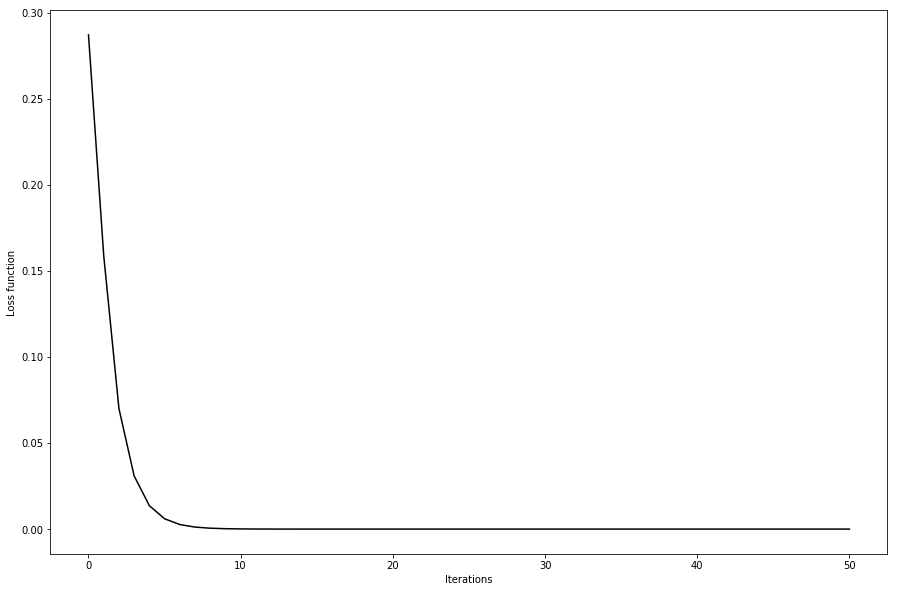

In [22]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

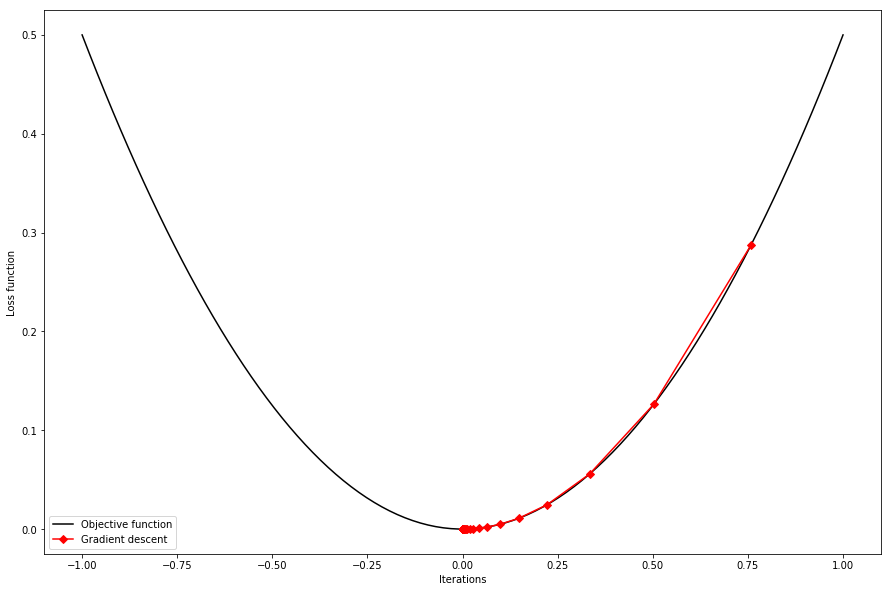

In [23]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_a(x), color='black', label='Objective function')
plt.plot(train_X, obj_a(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

### Influence of tau

In [24]:
torch.manual_seed(1)
X = torch.rand(1)
X.requires_grad = True

lr = 1e-1
nb_iter = 50
implicit_iter = 5
list_tau = [1e3, 1e-1]

In [25]:
train_loss_total = []
train_X_total = []

for tau in list_tau:
    print('Tau: ', tau)
    
    torch.manual_seed(1)
    X = torch.rand(1)
    X.requires_grad = True

    train_loss = np.array([])
    train_X = np.array([])
    loss = obj_a(X)
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    optimizer = optim.SGD([X], lr)
    
    for it in range(nb_iter):
        if it%10 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

        X_ = copy.deepcopy(X)
        X_.requires_grad = False

        train_loss_inner = np.array([])

        for inner_it in range(implicit_iter):
            loss = obj_a(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2

            train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        loss = obj_a(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2
        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_X = np.append(train_X, X.detach().numpy())
    
    train_loss_total.append(train_loss)
    train_X_total.append(train_X)

Tau:  1000.0
It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 7.648e-06
It: 20/50 | Loss: 2.037e-10
It: 30/50 | Loss: 5.426e-15
It: 40/50 | Loss: 1.445e-19
Tau:  0.1
It: 0/50 | Loss: 2.870e-01
It: 10/50 | Loss: 4.693e-02
It: 20/50 | Loss: 6.975e-03
It: 30/50 | Loss: 1.037e-03
It: 40/50 | Loss: 1.541e-04


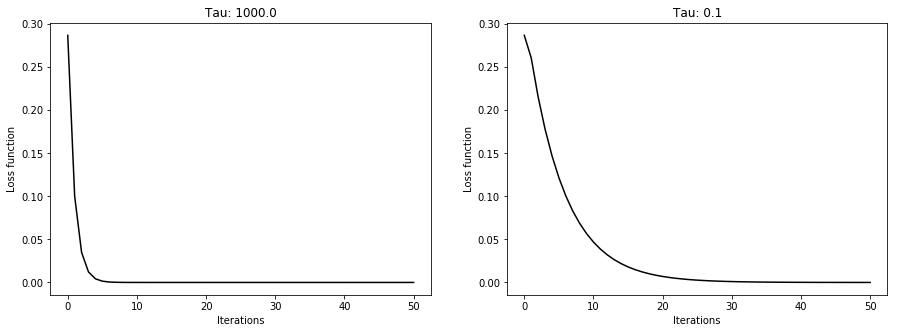

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Tau: ' + str(list_tau[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

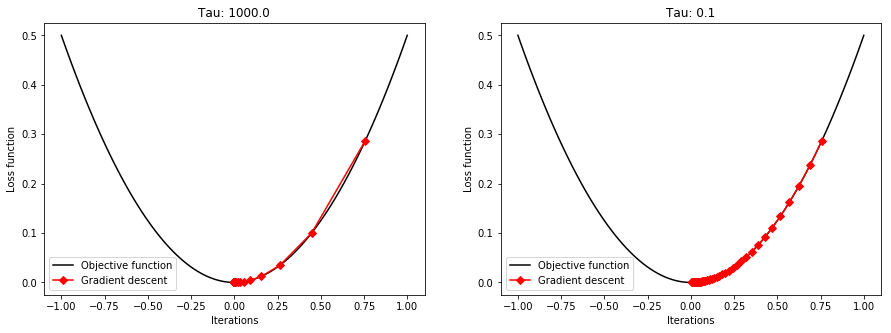

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_X in enumerate(train_X_total):
    ax = axs[i]
    ax.plot(x, obj_a(x), color='black')
    ax.plot(train_X, obj_a(train_X), color='red', marker='D')
    ax.set_title('Tau: ' + str(list_tau[i]))
    ax.legend(['Objective function','Gradient descent'])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

# 1D non-convex example

## Objective function

In [28]:
def obj_b_np(x):
    return (x-.5)**3 + 0.5*np.sin(16*x + 4) + (2*x)**4 - (3.5*x+0.2)**2

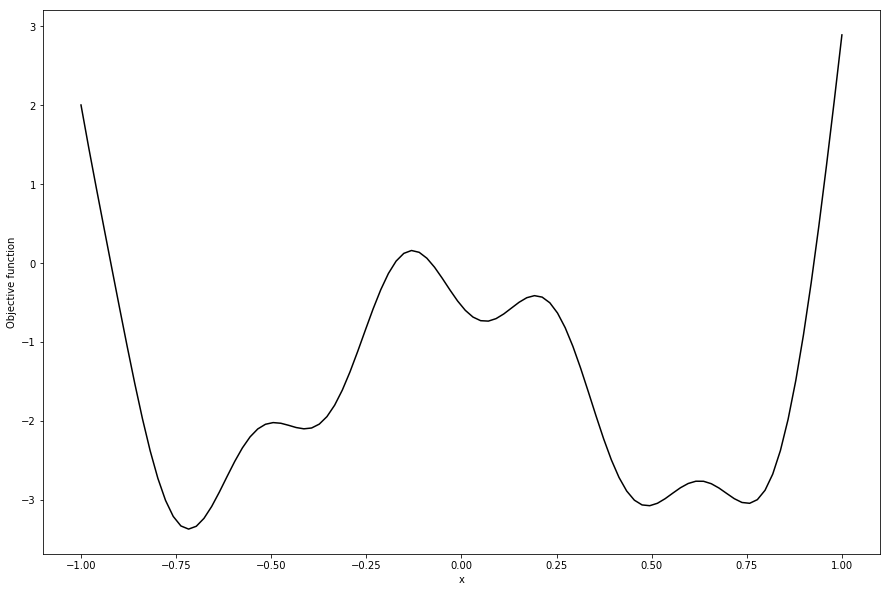

In [29]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_b_np(x), color='black')
plt.xlabel('x')
plt.ylabel('Objective function');

## Explicit - SGD

In [30]:
def obj_b(x):
    return (x-.5)**3 + 0.5*torch.sin(16*x + 4) + (2*x)**4 - (3.5*x+0.2)**2

In [31]:
X = torch.Tensor([.95])
X.requires_grad = True

lr = 1e-3
nb_iter = 50

In [32]:
optimizer = optim.SGD([X], lr)

In [33]:
train_loss = np.array([])
train_X = np.array([])

for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj_b(X)  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/50 | Loss: 8.693e-01
It: 10/50 | Loss: -3.001e+00
It: 20/50 | Loss: -3.045e+00
It: 30/50 | Loss: -3.047e+00
It: 40/50 | Loss: -3.047e+00


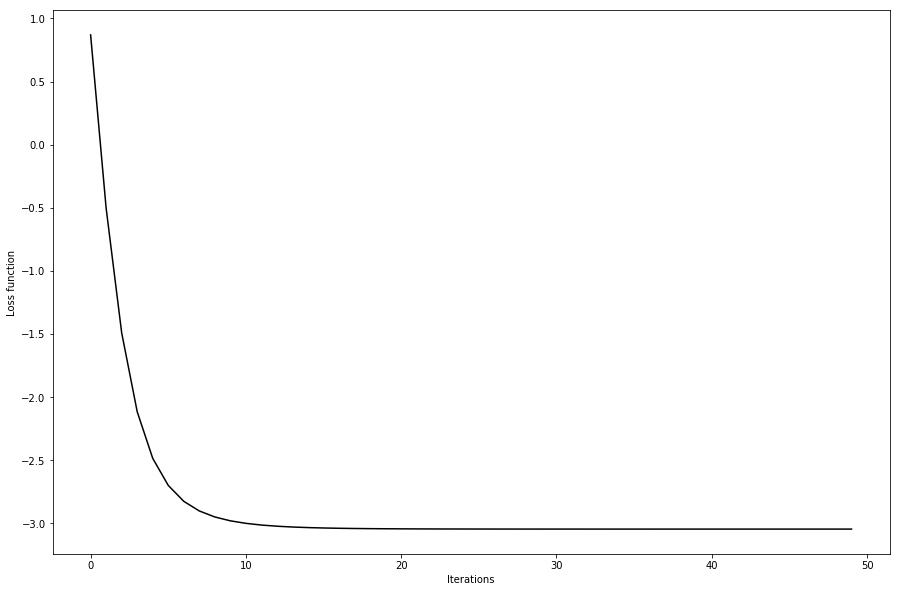

In [34]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

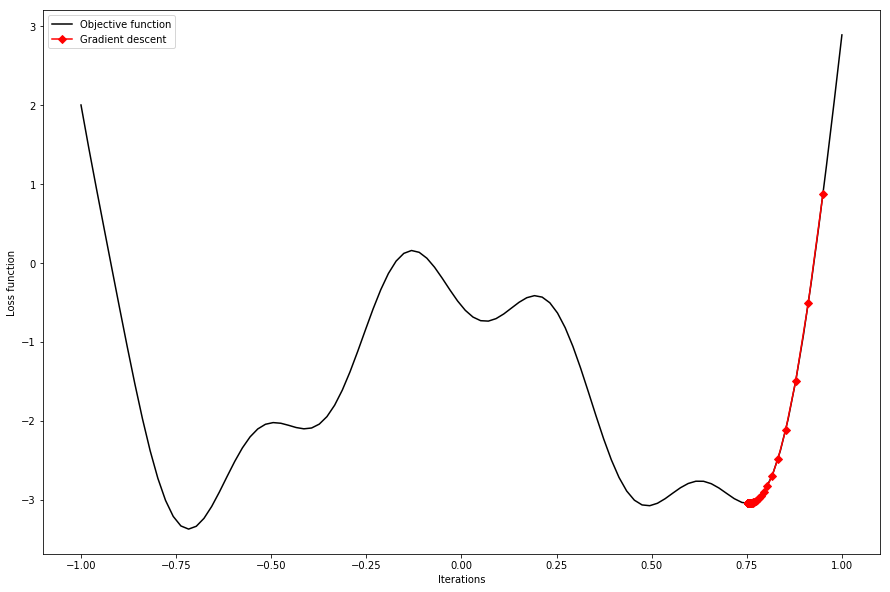

In [35]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_b_np(x), color='black', label='Objective function')
plt.plot(train_X, obj_b_np(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

## Explicit - SGLD

In [36]:
X = torch.Tensor([-0.1])
X.requires_grad = True

lr = 1e-3
nb_iter = 50
beta = 1

In [37]:
optimizer = SGLD([X], lr, **{'beta':beta})

In [38]:
train_loss = np.array([])
train_X = np.array([])

for it in range(nb_iter):
    optimizer.zero_grad()
    loss = obj_b(X)  
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    if it%10 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
    loss.backward()
    optimizer.step()

It: 0/50 | Loss: 1.008e-01
It: 10/50 | Loss: 6.434e-02
It: 20/50 | Loss: 1.584e-01
It: 30/50 | Loss: -2.580e-01
It: 40/50 | Loss: -1.889e+00


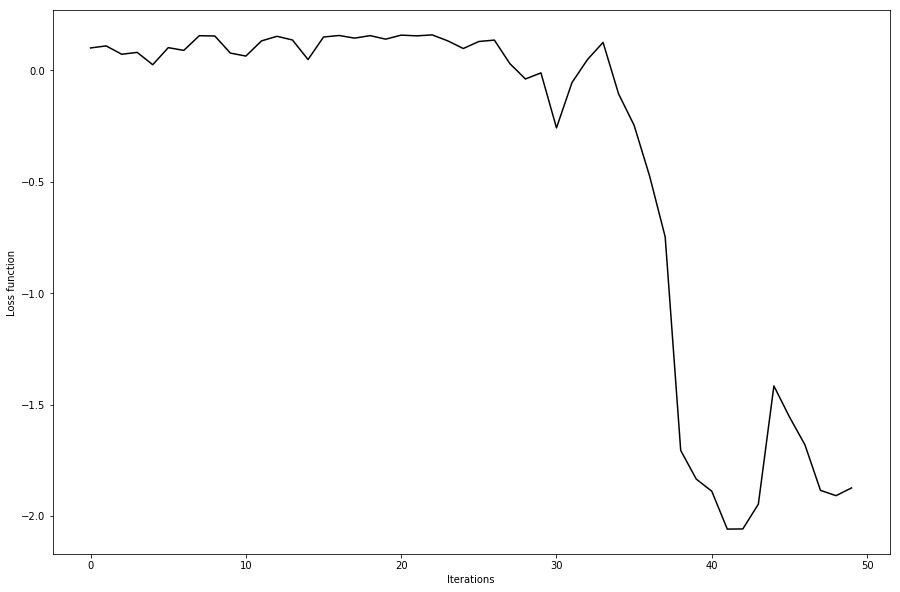

In [39]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

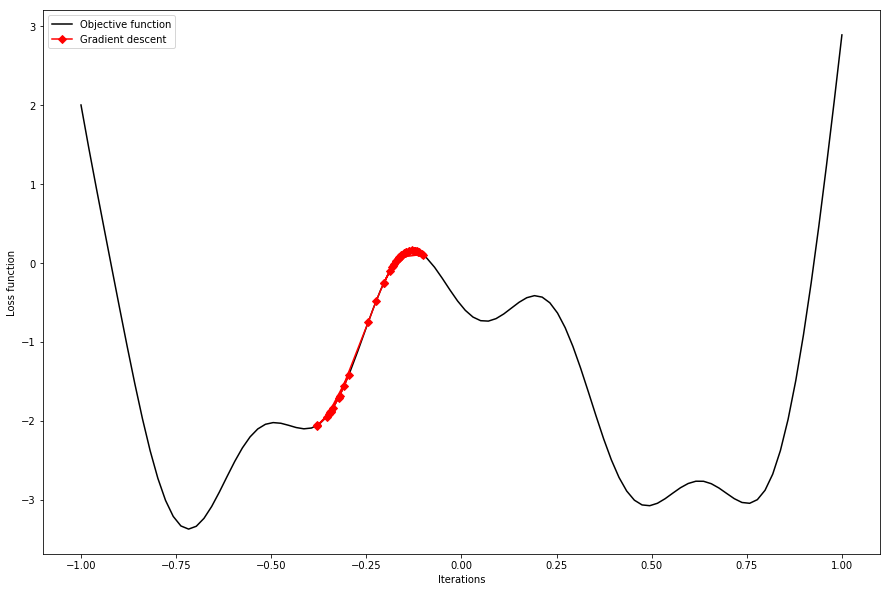

In [40]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_b_np(x), color='black', label='Objective function')
plt.plot(train_X, obj_b_np(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

### Influence of beta

In [41]:
lr = 1e-3
nb_iter = 50
list_beta = [100, 0.01]

In [42]:
train_loss_total = []
train_X_total = []

for beta in list_beta:
    print('Beta: ', beta)
    train_loss = np.array([])
    train_X = np.array([])
    
    X = torch.Tensor([-0.1])
    X.requires_grad = True

    optimizer = SGLD([X], lr, **{'beta':beta})
    for it in range(nb_iter):
        optimizer.zero_grad()
        loss = obj_b(X)  
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_X = np.append(train_X, X.detach().numpy())

        if it%10 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))
        loss.backward()
        optimizer.step()
    
    train_loss_total.append(train_loss)
    train_X_total.append(train_X)

Beta:  100
It: 0/50 | Loss: 1.008e-01
It: 10/50 | Loss: -2.456e-01
It: 20/50 | Loss: -6.837e-01
It: 30/50 | Loss: -7.341e-01
It: 40/50 | Loss: -7.311e-01
Beta:  0.01
It: 0/50 | Loss: 1.008e-01
It: 10/50 | Loss: 4.254e+01
It: 20/50 | Loss: -2.800e+00
It: 30/50 | Loss: -3.045e+00
It: 40/50 | Loss: -1.788e+00


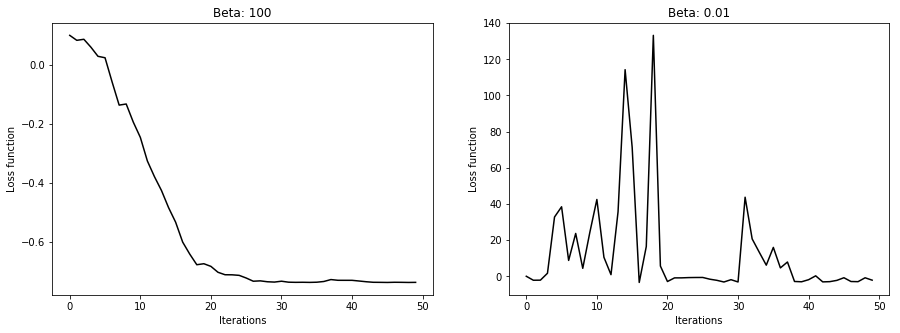

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Beta: ' + str(list_beta[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

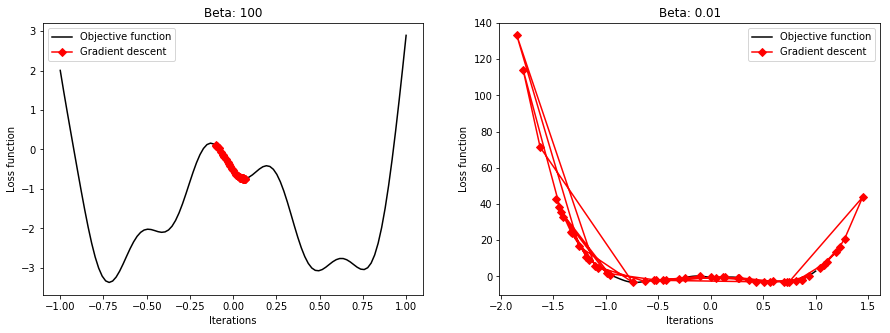

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_X in enumerate(train_X_total):
    ax = axs[i]
    ax.plot(x, obj_b_np(x), color='black')
    ax.plot(train_X, obj_b_np(train_X), color='red', marker='D')
    ax.set_title('Beta: ' + str(list_beta[i]))
    ax.legend(['Objective function','Gradient descent'])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

## Implicit - SGD

In [75]:
X = torch.Tensor([-0.1])
X.requires_grad = True

lr = 1e-3
nb_iter = 50
implicit_iter = 5
tau = 1e-1

In [76]:
optimizer = optim.SGD([X], lr)

It: 0/50 | Loss: 5.000e-03


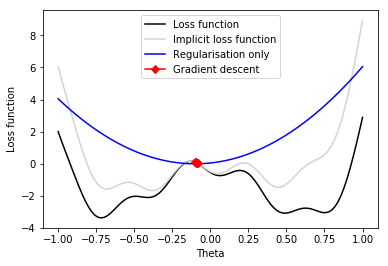

It: 1/50 | Loss: -1.160e-02


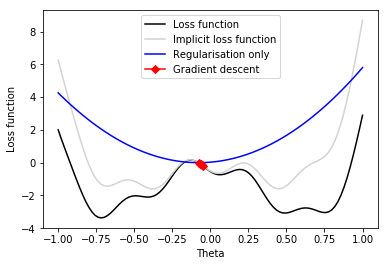

It: 2/50 | Loss: -2.336e-01


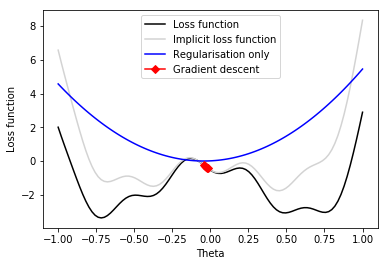

It: 3/50 | Loss: -4.812e-01


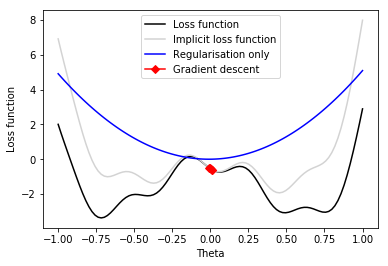

It: 4/50 | Loss: -6.351e-01


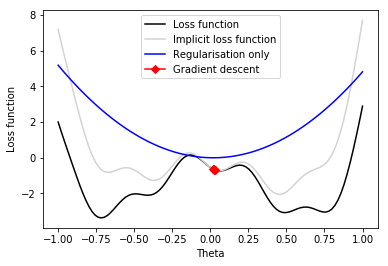

It: 5/50 | Loss: -7.008e-01


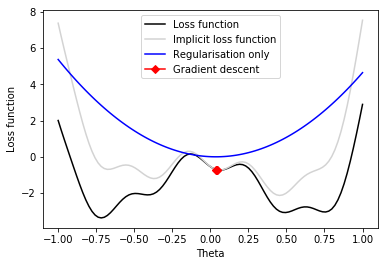

It: 6/50 | Loss: -7.249e-01


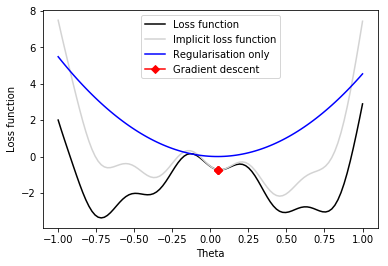

It: 7/50 | Loss: -7.335e-01


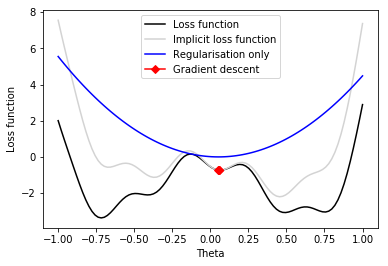

It: 8/50 | Loss: -7.366e-01


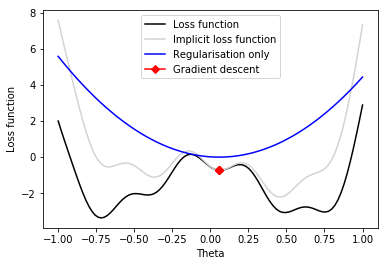

It: 9/50 | Loss: -7.377e-01


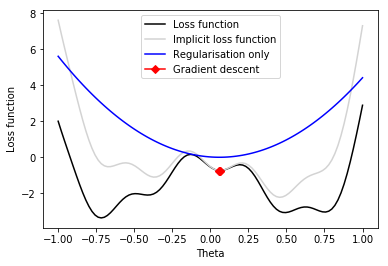

It: 10/50 | Loss: -7.381e-01


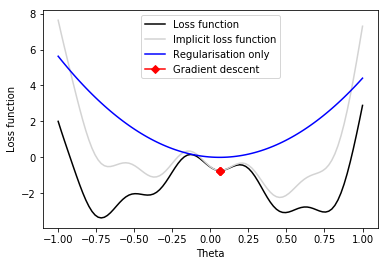

It: 11/50 | Loss: -7.382e-01


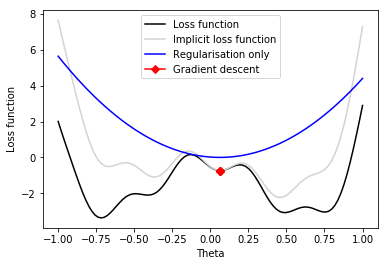

It: 12/50 | Loss: -7.383e-01


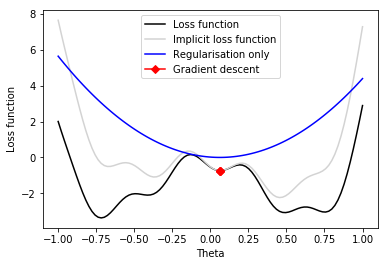

It: 13/50 | Loss: -7.383e-01


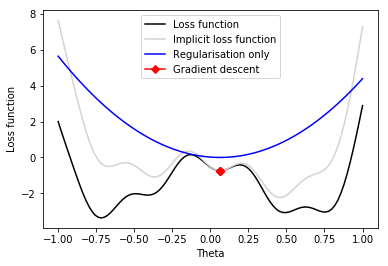

It: 14/50 | Loss: -7.383e-01


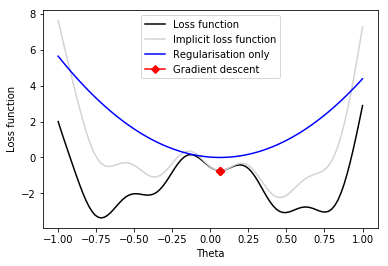

It: 15/50 | Loss: -7.383e-01


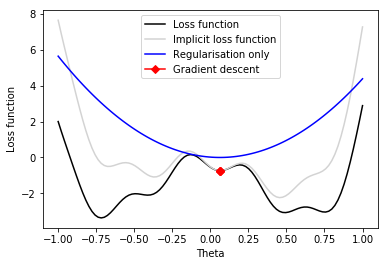

It: 16/50 | Loss: -7.383e-01


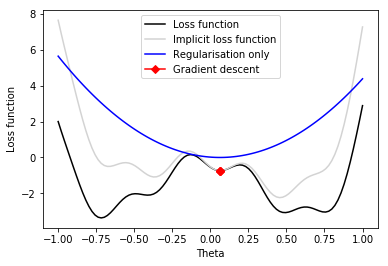

It: 17/50 | Loss: -7.383e-01


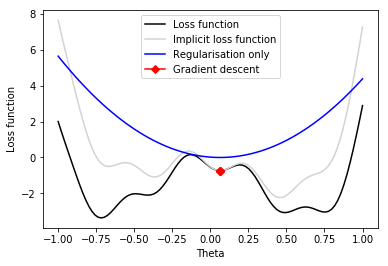

It: 18/50 | Loss: -7.383e-01


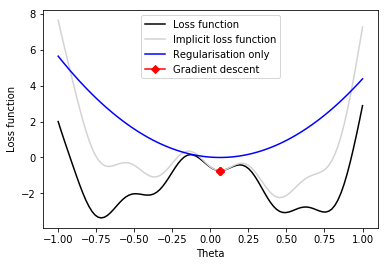

It: 19/50 | Loss: -7.383e-01


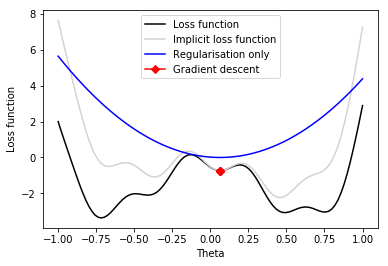

It: 20/50 | Loss: -7.383e-01


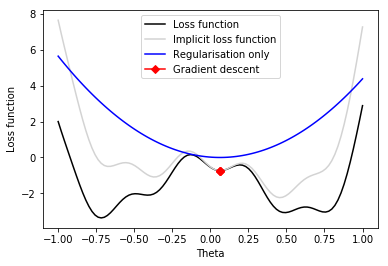

It: 21/50 | Loss: -7.383e-01


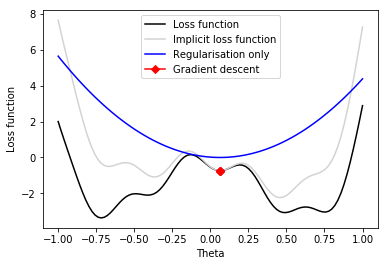

It: 22/50 | Loss: -7.383e-01


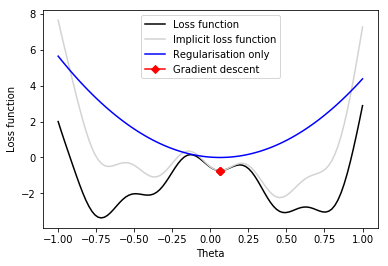

It: 23/50 | Loss: -7.383e-01


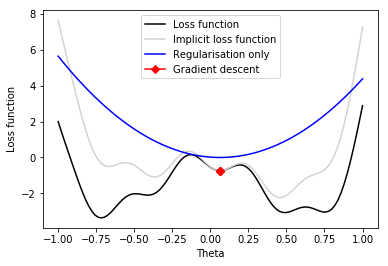

It: 24/50 | Loss: -7.383e-01


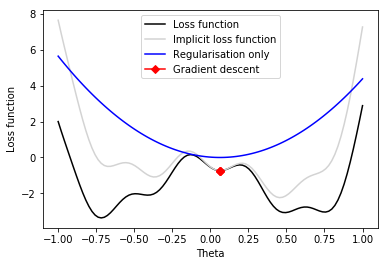

It: 25/50 | Loss: -7.383e-01


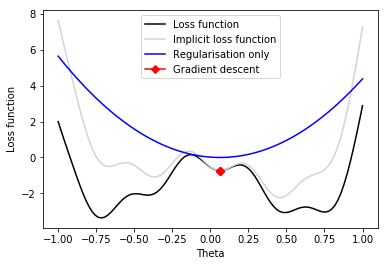

It: 26/50 | Loss: -7.383e-01


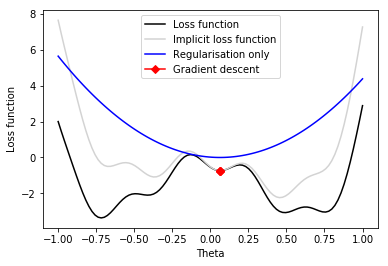

It: 27/50 | Loss: -7.383e-01


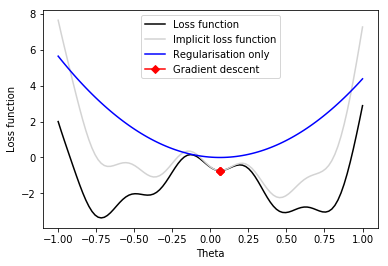

It: 28/50 | Loss: -7.383e-01


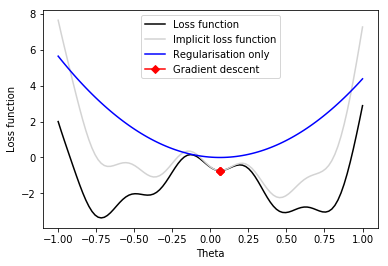

It: 29/50 | Loss: -7.383e-01


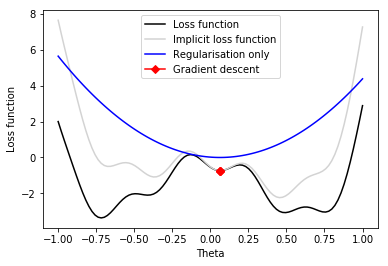

It: 30/50 | Loss: -7.383e-01


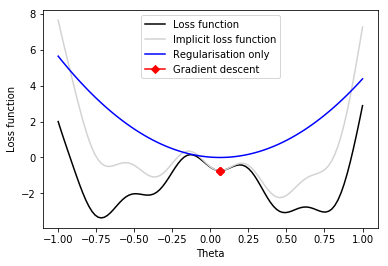

It: 31/50 | Loss: -7.383e-01


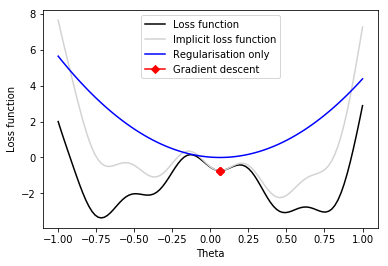

It: 32/50 | Loss: -7.383e-01


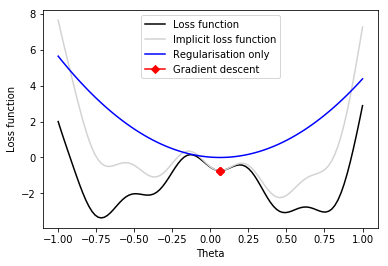

It: 33/50 | Loss: -7.383e-01


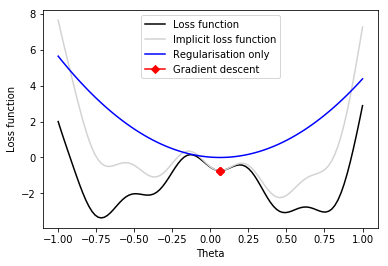

It: 34/50 | Loss: -7.383e-01


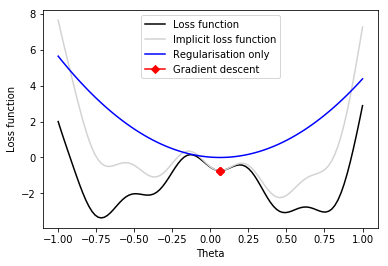

It: 35/50 | Loss: -7.383e-01


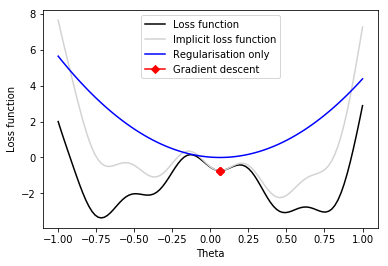

It: 36/50 | Loss: -7.383e-01


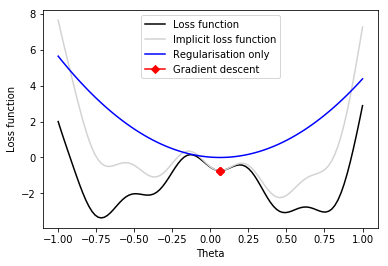

It: 37/50 | Loss: -7.383e-01


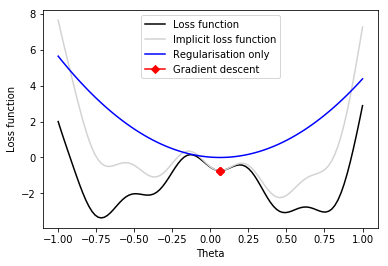

It: 38/50 | Loss: -7.383e-01


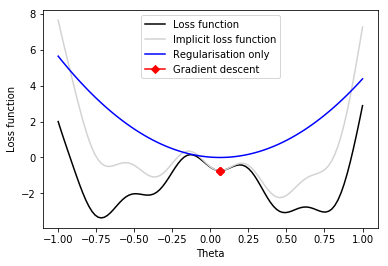

It: 39/50 | Loss: -7.383e-01


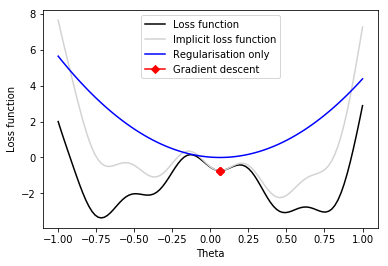

It: 40/50 | Loss: -7.383e-01


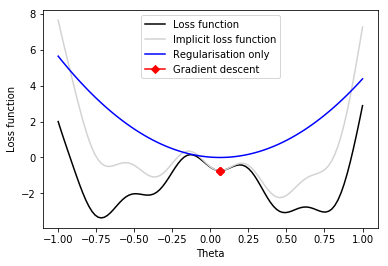

It: 41/50 | Loss: -7.383e-01


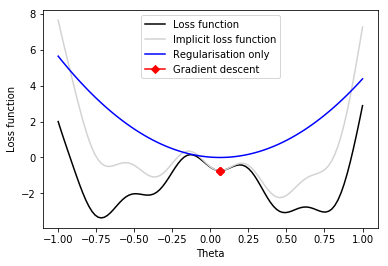

It: 42/50 | Loss: -7.383e-01


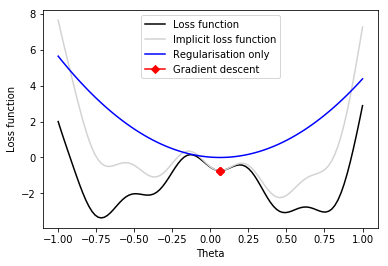

It: 43/50 | Loss: -7.383e-01


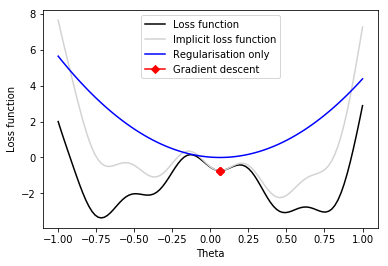

It: 44/50 | Loss: -7.383e-01


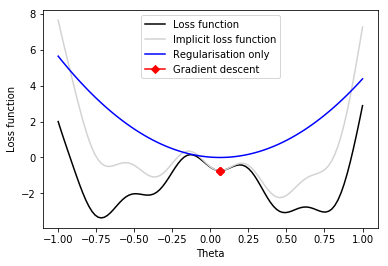

It: 45/50 | Loss: -7.383e-01


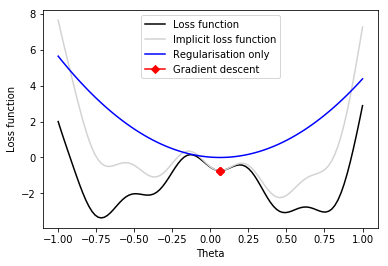

It: 46/50 | Loss: -7.383e-01


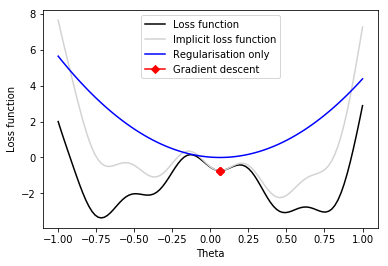

It: 47/50 | Loss: -7.383e-01


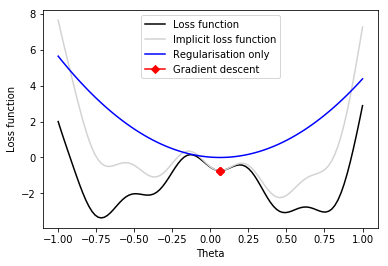

It: 48/50 | Loss: -7.383e-01


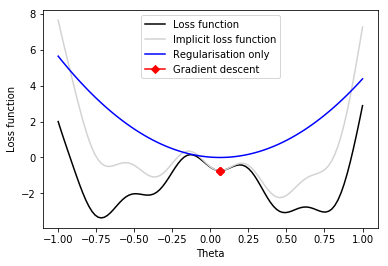

It: 49/50 | Loss: -7.383e-01


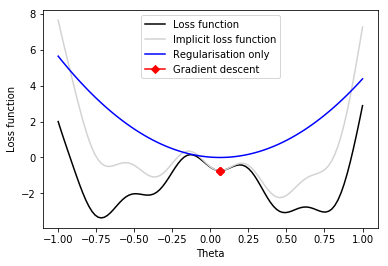

In [77]:
train_loss = np.array([])
train_X = np.array([])
loss = obj_a(X)
train_loss = np.append(train_loss, loss.detach().numpy())
train_X = np.append(train_X, X.detach().numpy())

for it in range(nb_iter):
    if it%1 == 0:
        print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

    X_ = copy.deepcopy(X)
    X_.requires_grad = False

    train_loss_inner = np.array([])
    train_X_inner = np.array([])

    for inner_it in range(implicit_iter):
        loss = obj_b(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2

        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_X_inner = np.append(train_X_inner, X.detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    plt.plot(x, obj_b_np(x), color='black', label='Loss function')
    plt.plot(x, obj_b_np(x) + 1/(2*tau)*(x - X_.numpy())**2, color='lightgrey', label='Implicit loss function')
    plt.plot(x, 1/(2*tau)*(x - X_.numpy())**2, color='b', label='Regularisation only')
    plt.plot(train_X_inner, train_loss_inner, color='r', marker='D' , label='Gradient descent')
    plt.xlabel('Theta')
    plt.ylabel('Loss function')
    plt.legend()
    
    plt.show()
        
    loss = obj_b(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2
    train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

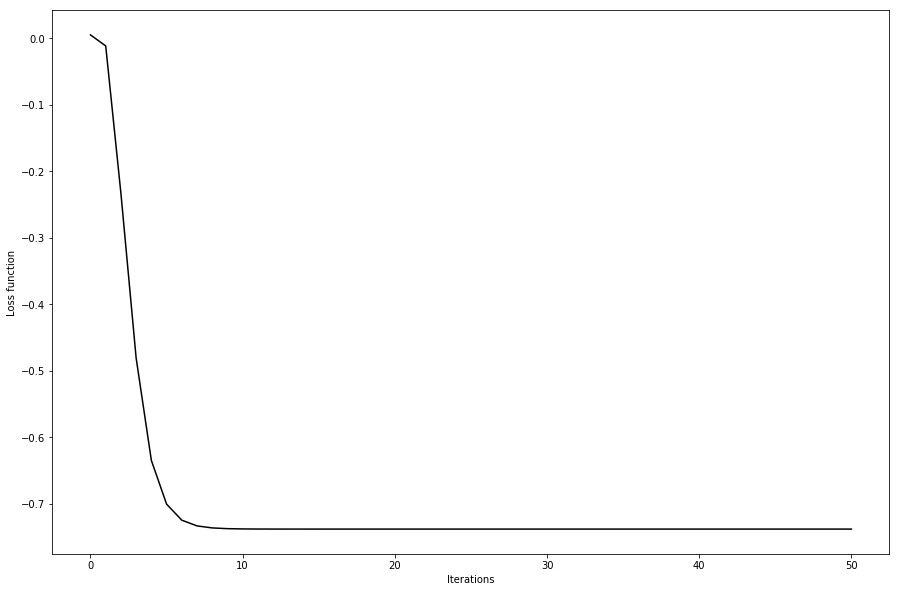

In [158]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, color='black')
plt.xlabel('Iterations')
plt.ylabel('Loss function');

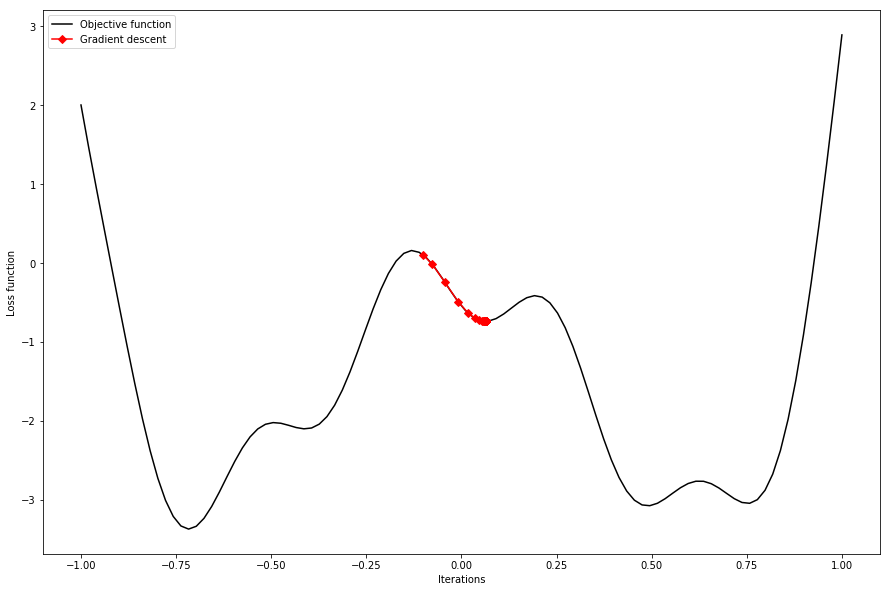

In [159]:
plt.figure(figsize=(15,10))
plt.plot(x, obj_b_np(x), color='black', label='Objective function')
plt.plot(train_X, obj_b_np(train_X), color='red', marker='D', label='Gradient descent')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend();

### Influence of tau

In [21]:
lr = 1e-3
nb_iter = 50
implicit_iter = 5
list_tau = [1e3, 1e-3]

In [22]:
train_loss_total = []
train_X_total = []

for tau in list_tau:
    print('Tau: ', tau)
    
    X = torch.Tensor([-0.1])
    X.requires_grad = True

    train_loss = np.array([])
    train_X = np.array([])
    loss = obj_b(X)
    train_loss = np.append(train_loss, loss.detach().numpy())
    train_X = np.append(train_X, X.detach().numpy())

    optimizer = optim.SGD([X], lr)
    
    for it in range(nb_iter):
        if it%10 == 0:
            print('It: %d/%d | Loss: %.3e' % (it, nb_iter, loss))

        X_ = copy.deepcopy(X)
        X_.requires_grad = False

        train_loss_inner = np.array([])

        for inner_it in range(implicit_iter):
            loss = obj_b(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2

            train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        loss = obj_b(X) + 1/(2*tau) * torch.norm(X - X_, 2)**2
        train_loss_inner = np.append(train_loss_inner, loss.detach().numpy())
        train_loss = np.append(train_loss, loss.detach().numpy())
        train_X = np.append(train_X, X.detach().numpy())
    
    train_loss_total.append(train_loss)
    train_X_total.append(train_X)

Tau:  1000.0
It: 0/50 | Loss: 1.008e-01
It: 10/50 | Loss: -7.382e-01
It: 20/50 | Loss: -7.383e-01
It: 30/50 | Loss: -7.383e-01
It: 40/50 | Loss: -7.383e-01
Tau:  0.001
It: 0/50 | Loss: 1.008e-01
It: 10/50 | Loss: -2.561e-01
It: 20/50 | Loss: -6.394e-01
It: 30/50 | Loss: -7.236e-01
It: 40/50 | Loss: -7.361e-01


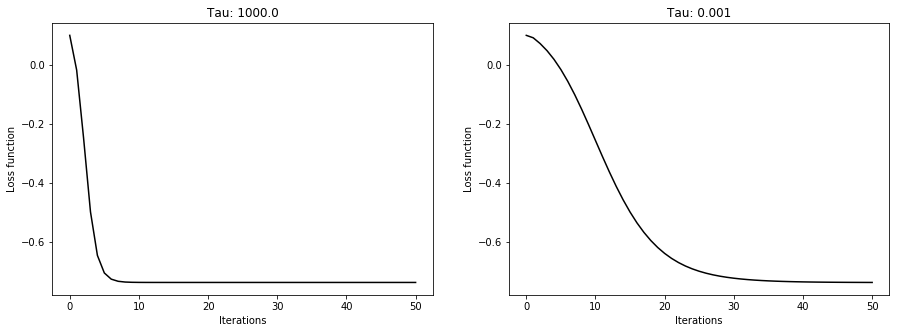

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_loss in enumerate(train_loss_total):
    ax = axs[i]
    ax.plot(train_loss, color='black')
    ax.set_title('Tau: ' + str(list_tau[i]))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')

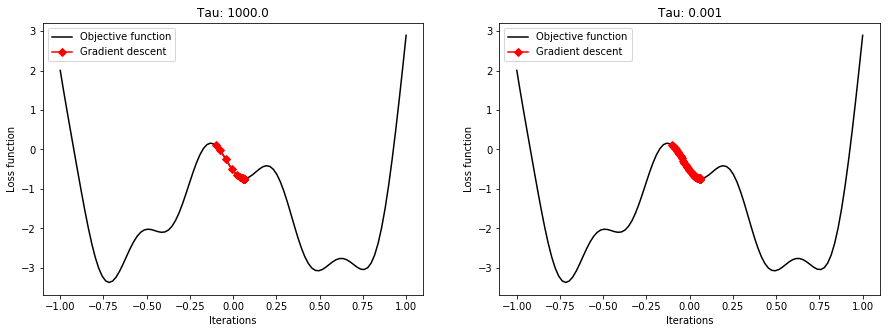

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

for i, train_X in enumerate(train_X_total):
    ax = axs[i]
    ax.plot(x, obj_b_np(x), color='black')
    ax.plot(train_X, obj_b_np(train_X), color='red', marker='D')
    ax.set_title('Tau: ' + str(list_tau[i]))
    ax.legend(['Objective function','Gradient descent'])
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Loss function')